In [1]:
import pandas as pd
import numpy as np 

In [ ]:
rg = np.random.default_rng()
bias = 0.5
l_rate = 0.01
epochs = 20
epochs_loss = []

In [7]:
def generator_data(n_features,n_values):
    features = rg.random((n_features, n_values))
    print("features:",features)
    weights = rg.random((1, n_values))[0]
    print("weights:",weights)
    target = np.random.choice([0,1], n_features)
    print("target:",target)
    data = pd.DataFrame(features, columns=["x0","x1","x2","x3"])
    data ["target"] = target
    display(data)
    return data , weights

def get_weighted_sum(feature,weights,bias):
    return np.dot(feature,weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1 - target)*np.log(1 - prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x,w in zip(feature,weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return  bias + l_rate*(target - prediction)

data , weights = generator_data(50,4) 

features: [[0.38440008 0.12939379 0.86655369 0.03561512]
 [0.17621012 0.45330989 0.30261493 0.46237311]
 [0.5256026  0.34535728 0.58043204 0.1983634 ]
 [0.71742247 0.96749909 0.30719709 0.82646226]
 [0.79303572 0.63515116 0.79941043 0.9599793 ]
 [0.36416571 0.10626271 0.05928463 0.23074295]
 [0.79573323 0.95494523 0.16747285 0.00738138]
 [0.66152185 0.29067527 0.29248892 0.53354462]
 [0.62330599 0.05674102 0.62588249 0.31066618]
 [0.47550991 0.59759191 0.50447725 0.42168239]
 [0.48284469 0.08534479 0.57782509 0.58799704]
 [0.19762781 0.30903244 0.19960105 0.33370813]
 [0.44931654 0.09048504 0.85064408 0.96258593]
 [0.01891943 0.86195838 0.01544575 0.50226571]
 [0.98088595 0.86875802 0.29802102 0.30637354]
 [0.42807088 0.39964825 0.88453117 0.50582637]
 [0.1983159  0.09511445 0.65038187 0.65092032]
 [0.37760133 0.05211316 0.52617373 0.57889424]
 [0.34448751 0.99692328 0.30953727 0.13261527]
 [0.72450063 0.08335741 0.63503327 0.79993199]
 [0.50441825 0.54975684 0.55114558 0.99738933]
 [0

,x0,x1,x2,x3,target
0,0.384400,0.129394,0.866554,0.035615,0
1,0.176210,0.453310,0.302615,0.462373,1
2,0.525603,0.345357,0.580432,0.198363,1
3,0.717422,0.967499,0.307197,0.826462,0
4,0.793036,0.635151,0.799410,0.959979,1
5,0.364166,0.106263,0.059285,0.230743,1
6,0.795733,0.954945,0.167473,0.007381,0
7,0.661522,0.290675,0.292489,0.533545,0
8,0.623306,0.056741,0.625882,0.310666,1
9,0.475510,0.597592,0.504477,0.421682,1


In [8]:
def trian_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []
        for i in range(len(data)): 
            feature = data.loc[i][:-1] 
            target = data.loc[i][-1]
            w_sum = get_weighted_sum(feature,weights,bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss) 
#             print("old weight",weights)
#             print("old bias",bias)
            weights = update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
#             print("feature",feature)
#             print("target",target)
#             print("w_sum",w_sum)
#             print("prediction",prediction)
#             print("loss",loss)
#             print("new weights",weights)
#             print("new bias",bias)
        average_loss = sum(individual_loss)/len(individual_loss)
        epochs_loss.append(average_loss)
        print("***********************")
        print("epoch",e)
        print(average_loss)
trian_model(data, weights, bias, l_rate, epochs)

***********************
epoch 0
0.9055283778881624
***********************
epoch 1
0.8058052135348893
***********************
epoch 2
0.7274598325020898
***********************
epoch 3
0.6676241904285811
***********************
epoch 4
0.6228038243381021
***********************
epoch 5
0.5895868934929954
***********************
epoch 6
0.565052195538114
***********************
epoch 7
0.5468952568685805
***********************
epoch 8
0.5333863493545205
***********************
epoch 9
0.5232629040844637
***********************
epoch 10
0.515615399061386
***********************
epoch 11
0.5097908669633103
***********************
epoch 12
0.5053192110001518
***********************
epoch 13
0.501859781979546
***********************
epoch 14
0.4991636406681498
***********************
epoch 15
0.49704719210367204
***********************
epoch 16
0.495373796666373
***********************
epoch 17
0.494040891018124
***********************
epoch 18
0.49297089692610735
***********************
e

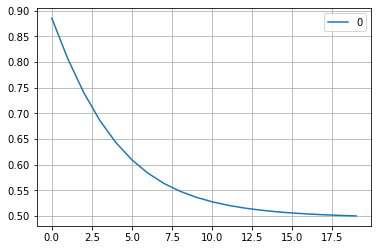

In [5]:
df = pd.DataFrame(epochs_loss)
df_plot = df.plot(kind='line', grid = True).get_figure()
# df_plot.savefig("Trinning_loss.pdf")